1)	Переклассификация типа записи пользователя. Вам необходимо понять была ли переквалификация запроса или нет. Если да, то к какому типу переквалификации ее нужно отнести. Также не используйте для обучения столбец “итоговый тип обращения”, так как в тесте его нету. Задача оценивается метрикой macro-average f1-score

2)	Выявление аномалий. Необходимо выявить аномальные ситуации, когда система функционирует некорректно. Здесь проверка осуществляется на кол-во найденных аномалий, т.е. во время защит, вы должны озвучить какое кол-во ваша команда нашла. 

3)	Выделение причин нарушения и прогноз нарушений. Задача связана с прошлой. Вам необходимо найти паттерны аномальных ситуаций. Т.е. результатом третьей подзадачи является аналитика по аномалиям (Что их связывает? Какие процессы приводят к нарушению работы и т.п.)


критерии аномалии. что такое аномалия

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv", index_col="id")

# Данные в нейронку
---

In [ ]:
df = df.drop_duplicates()
df = df.sample(len(df))

In [ ]:
data_df = pd.concat((df, test_df))

date_list = ["Дата обращения", "Дата восстановления", "Дата закрытия обращения","Крайний срок"]
for col_name in date_list:
  data_df[col_name] = pd.to_datetime(data_df[col_name])
  
data_df["Дата восстановления"] = data_df.apply(lambda x: x["Дата закрытия обращения"] if x["Дата восстановления"] is pd.NaT else x["Дата восстановления"],axis=1)  


In [ ]:
data_df["date_dif"] = data_df["Дата восстановления"] - data_df["Дата обращения"]
data_df["date_dif"] = (data_df["date_dif"] - data_df["date_dif"].mean()) / data_df["date_dif"].std()

In [ ]:
data_df["Решение             "] = data_df["Решение             "].str.lower()


In [ ]:
data_df["word1"] = 0
data_df.loc[data_df["Решение             "].str.find("инц") != -1, "word1" ] = 1

In [ ]:
data_df["y"] = 0
data_df.loc[data_df["Тип переклассификации"] != 0, "y" ] = 1

In [ ]:
request_df = data_df[data_df["Тип обращения на момент подачи"] == "Запрос"]
incident_df = data_df[data_df["Тип обращения на момент подачи"] == "Инцидент"]



In [ ]:
def make_sparse(seq): 
  layer = tf.keras.layers.StringLookup()
  layer.adapt(seq)
  tensor = layer(seq) 
  sp = tf.sparse.from_dense(tf.cast(tf.one_hot(tensor, tf.math.reduce_max(tensor).numpy()), dtype=tf.int32))
  return sp

In [ ]:
incident_df[incident_df['Тип обращения итоговый'].isna()]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,date_dif,word1,y
14844,.Сброс зависшей сессии,Сервис22,3-Низкий,Закрыт,ФГ94,2018-02-21 14:46:00,2018-02-16 13:31:00,Инцидент,NaN,решено самостоятельно,NaN,2018-02-16 14:14:00,2018-02-23 15:31:00,2-Повышенная,3-Малое,Система13,Место3,-0.379926,0,1
14852,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 14:55:00,2018-02-16 13:40:00,Инцидент,NaN,"в меню ""сведения договора"" - ""редакции/версии ...",NaN,2018-02-16 14:38:00,2018-02-17 13:29:00,3-Базовая,4-Нет влияния,Система18,Место47,-0.377834,0,1
14854,Ремонт МФУ,Сервис25,3-Низкий,Закрыт,ФГ79,2018-02-21 11:57:00,2018-02-16 13:42:00,Инцидент,NaN,отремонтирован,NaN,2018-02-17 14:56:00,2018-02-25 07:16:00,4-Нет,3-Малое,Система25,Место32,-0.174750,0,1
14858,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-21 15:03:00,2018-02-16 13:48:00,Инцидент,NaN,"в меню ""сведения договора"" - ""редакции/версии ...",NaN,2018-02-16 14:41:00,2018-02-17 13:28:00,3-Базовая,4-Нет влияния,Система18,Место47,-0.378531,0,1
14885,ремонт МФУ,Сервис25,3-Низкий,Закрыт,ФГ79,2018-02-21 12:24:00,2018-02-16 14:09:00,Инцидент,NaN,произведен ремонт,NaN,2018-02-21 07:08:00,2018-02-21 07:11:00,4-Нет,3-Малое,Система25,Место32,0.559617,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36:00,2018-02-25 20:53:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:32:00,2018-03-14 07:53:00,4-Нет,3-Малое,Система11,Место1,-0.305164,0,1
21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36:00,2018-02-25 20:56:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57:00,2018-03-14 07:53:00,2-Повышенная,3-Малое,Система53,Место1,-0.310465,0,1
21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06:00,2018-02-25 20:58:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00:00,2018-03-14 07:53:00,1-Особая,3-Малое,Система52,Место1,-0.310325,0,1
21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36:00,2018-02-25 21:05:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03:00,2018-03-14 07:53:00,4-Нет,3-Малое,Система11,Место1,-0.310883,0,1


In [ ]:
incident_df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,date_dif,word1,y
12140,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-16 08:31:00,2018-02-11 11:31:00,Инцидент,Запрос,дог-********* открыт для редактирования.,2.0,2018-02-11 12:14:00,2018-02-11 13:38:00,3-Базовая,4-Нет влияния,Система18,Место156,-0.379926,0,1
10812,<Бот-наблюдения> Система234. Ухудшение статуса...,Сервис216,3-Низкий,Закрыт,ФГ19,2018-02-14 14:27:00,2018-02-10 07:12:00,Инцидент,Инцидент,"временная недоступность страницы, на момент пр...",0.0,2018-02-10 08:01:00,2018-02-17 09:24:00,4-Нет,3-Малое,Система234,Место1,-0.379089,0,0
9269,Проблемы со входом в Система22,Сервис22,3-Низкий,Закрыт,ФГ62,2018-02-08 15:39:00,2018-02-08 07:39:00,Инцидент,Запрос,"инициатору направлена информация о том, что пр...",2.0,2018-02-08 11:29:00,2018-02-15 12:47:00,2-Повышенная,3-Малое,Система22,Место359,-0.353843,0,1
12612,Сообщить об ошибке/неисправности Система18,Сервис18,3-Низкий,Закрыт,ФГ18,2018-02-16 12:36:00,2018-02-14 06:23:00,Инцидент,Инцидент,контрагент добавлен в справочник поставщиков в...,0.0,2018-02-14 06:32:00,2018-02-14 07:07:00,3-Базовая,4-Нет влияния,Система18,Место12,-0.384669,0,0
3479,ЭП - восстановить письма,Сервис12,2-Средний,Закрыт,ФГ58,2018-02-03 11:40:00,2018-01-31 11:40:00,Инцидент,Запрос,проведена консультация по восстановлению с сер...,2.0,2018-01-31 11:58:00,2018-01-31 13:00:00,1-Особая,3-Малое,Система35,Место31,-0.383413,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21141,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36:00,2018-02-25 20:53:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:32:00,2018-03-14 07:53:00,4-Нет,3-Малое,Система11,Место1,-0.305164,0,1
21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36:00,2018-02-25 20:56:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57:00,2018-03-14 07:53:00,2-Повышенная,3-Малое,Система53,Место1,-0.310465,0,1
21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06:00,2018-02-25 20:58:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00:00,2018-03-14 07:53:00,1-Особая,3-Малое,Система52,Место1,-0.310325,0,1
21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36:00,2018-02-25 21:05:00,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03:00,2018-03-14 07:53:00,4-Нет,3-Малое,Система11,Место1,-0.310883,0,1


In [ ]:
incident_df[incident_df['Тип обращения итоговый'].isna()].index

Int64Index([14844, 14852, 14854, 14858, 14885, 14966, 14988, 15003, 15009,
            15021,
            ...
            20959, 21132, 21134, 21139, 21140, 21141, 21142, 21143, 21144,
            21145],
           dtype='int64', length=430)

In [ ]:
def make_data(work_df, batch_size):
  ohe_col_list = ["Сервис", "Приоритет", "Функциональная группа", "Критичность", "Влияние", "Система"]
  sp_list = []
  for col_name in ohe_col_list:
    sp_list.append(make_sparse(work_df[col_name]))





  dataset = tf.data.Dataset.from_tensor_slices((work_df[["date_dif", "word1"]].to_numpy(), tf.sparse.concat(1, sp_list), work_df["y"]))
  dataset = dataset.map(lambda x1,x2,y: ((x1, x2), y))

  test_index_list = work_df[work_df['Тип обращения итоговый'].isna()].index
  
  
  train_len = len(work_df[work_df['Тип обращения итоговый'].isna()])
  val_split = int(0.25 * train_len)

  ds = dataset.take(train_len)
  test_ds = dataset.skip(train_len)

  #ds = ds.shuffle(train_len)
  val_ds = ds.take(val_split)
  train_ds = ds.skip(val_split)

  val_ds = val_ds.batch(batch_size)
  train_ds = train_ds.batch(batch_size)

  print(dataset.cardinality().numpy())
  print(train_ds.cardinality().numpy())
  print(val_ds.cardinality().numpy())
  print(test_ds.cardinality().numpy())

  return train_ds, val_ds, test_ds, test_index_list

In [ ]:
train_ds_i, val_ds_i, test_ds_i, test_index_list_i = make_data(incident_df, 8)
train_ds_r, val_ds_r, test_ds_r, test_index_list_r = make_data(request_df, 32)

877
41
14
447
18751
139
47
12837


In [ ]:
5914+ 430

6344

In [ ]:
test_index_list_r

Int64Index([14803, 14804, 14805, 14806, 14807, 14808, 14809, 14810, 14811,
            14812,
            ...
            21128, 21129, 21130, 21131, 21133, 21135, 21136, 21137, 21138,
            21146],
           dtype='int64', length=5914)

In [ ]:
my_gen = train_ds.as_numpy_iterator()

In [ ]:
a = next(my_gen)

In [ ]:
a


# Нейронка
--- 

In [ ]:
from tensorflow.keras import Input, Model, Sequential
from tensorflow.keras.layers import Dense, concatenate 
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
checkpoint_incident = tf.keras.callbacks.ModelCheckpoint(filepath=f"/content/model_incident.h5", monitor="val_loss", verbose=0, save_best_only=True)

input_de = Input(shape=train_ds_i.element_spec[0][0].shape[1:])

input_sp = Input(train_ds_i.element_spec[0][1].shape[1:])

layer = concatenate([input_de, input_sp])


layer = (Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))(layer)
layer = (Dense(4, activation='relu'))(layer)
layer = (Dense(1, activation='sigmoid'))(layer)

model_incident = Model(inputs=[input_de, input_sp], outputs=layer)

model_incident.compile(optimizer='adam',
              loss="binary_focal_crossentropy",
              metrics='acc') 

In [ ]:
history = model_incident.fit(train_ds_i,  
                        epochs=20,                         
                        validation_data = val_ds_i,
                        callbacks=checkpoint_incident,
                        )

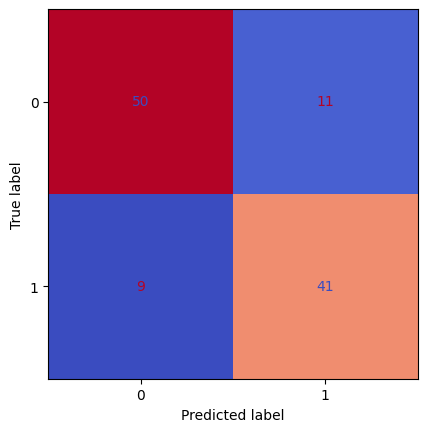

In [ ]:
model_test = tf.keras.models.load_model("/content/model_incident.h5")

y_true_i = list(val_ds_i.unbatch().map(lambda x,y: y).as_numpy_iterator())
y_pred_i = np.squeeze(np.round(model_test.predict(val_ds_i, verbose=0)))



ConfusionMatrixDisplay.from_predictions(y_true_i, y_pred_i, 
                                        colorbar=False, 
                                        cmap="coolwarm")
plt.show()

In [ ]:
checkpoint_request = tf.keras.callbacks.ModelCheckpoint(filepath=f"/content/model_request.h5", monitor="val_loss", verbose=0, save_best_only=True)

input_de = Input(shape=train_ds_r.element_spec[0][0].shape[1:])

input_sp = Input(train_ds_r.element_spec[0][1].shape[1:])

layer = concatenate([input_de, input_sp])


layer = (Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))(layer)
layer = (Dense(4, activation='relu'))(layer)
layer = (Dense(1, activation='sigmoid'))(layer)

model_request = Model(inputs=[input_de, input_sp], outputs=layer)

model_request.compile(optimizer='adam',
              loss="binary_focal_crossentropy",
              metrics='acc') 

In [ ]:
history = model_request.fit(train_ds_r,  
                        epochs=20,                         
                        validation_data = val_ds_r,
                        callbacks=checkpoint_request,
                        )

Epoch 1/20
301/301 [==============================] - 3s 7ms/step - loss: 0.0281 - acc: 0.9847 - val_loss: 0.0086 - val_acc: 0.9919
Epoch 2/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0113 - acc: 0.9887 - val_loss: 0.0073 - val_acc: 0.9919
Epoch 3/20
301/301 [==============================] - 1s 4ms/step - loss: 0.0100 - acc: 0.9887 - val_loss: 0.0069 - val_acc: 0.9919
Epoch 4/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0091 - acc: 0.9887 - val_loss: 0.0067 - val_acc: 0.9919
Epoch 5/20
301/301 [==============================] - 2s 5ms/step - loss: 0.0084 - acc: 0.9912 - val_loss: 0.0063 - val_acc: 0.9956
Epoch 6/20
301/301 [==============================] - 1s 3ms/step - loss: 0.0076 - acc: 0.9936 - val_loss: 0.0059 - val_acc: 0.9956
Epoch 7/20
301/301 [==============================] - 1s 4ms/step - loss: 0.0069 - acc: 0.9941 - val_loss: 0.0056 - val_acc: 0.9959
Epoch 8/20
301/301 [==============================] - 1s 4ms/step - loss: 0.

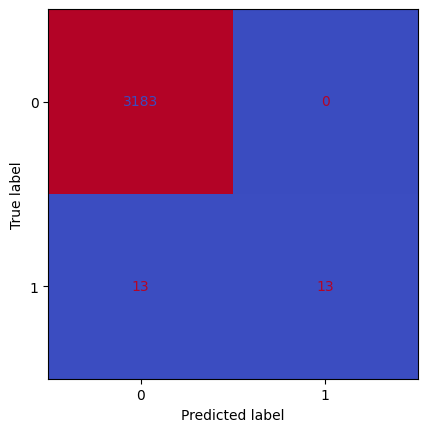

In [ ]:
model_test = tf.keras.models.load_model("/content/model_request.h5")

y_true_r = list(val_ds_r.unbatch().map(lambda x,y: y).as_numpy_iterator())
y_pred_r = np.squeeze(np.round(model_test.predict(val_ds_r, verbose=0)))

ConfusionMatrixDisplay.from_predictions(y_true_r, y_pred_r, 
                                        colorbar=False, 
                                        cmap="coolwarm")
plt.show()

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
model_incident = tf.keras.models.load_model("/content/model_incident.h5")
y_true_i = list(val_ds_i.unbatch().map(lambda x,y: y).as_numpy_iterator())
y_pred_i = np.squeeze(np.round(model_incident.predict(val_ds_i, verbose=0)))

model_request = tf.keras.models.load_model("/content/model_request.h5")
y_true_r = list(val_ds_r.unbatch().map(lambda x,y: y).as_numpy_iterator())
y_pred_r = np.squeeze(np.round(model_request.predict(val_ds_r, verbose=0)))

y_true_i = np.array(y_true_i)
y_true_i[y_true_i == 1] = 2
y_pred_i[y_pred_i == 1] = 2

y_true = np.hstack((y_true_r, y_true_i))
y_pred = np.hstack((y_pred_r, y_pred_i))

F1 score: 0.8218368436773078


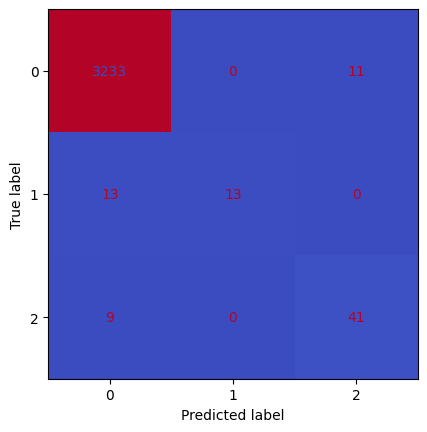

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, 
                                        colorbar=False, 
                                        cmap="coolwarm")
print(f"F1 score: {f1_score(y_true, y_pred, average='macro')}")
plt.show()

In [ ]:
model_incident = tf.keras.models.load_model("/content/model_incident.h5")

y_test_pred_i = np.squeeze(np.round(model_incident.predict(test_ds_i, verbose=0)))

ValueError: ignored

In [ ]:
test_index_list_r

# Исследования
---

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:

df["Влияние"] .unique()

array(['3-Малое', '4-Нет влияния', '2-Значительное', '1-Всеохватывающее'],
      dtype=object)

In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Тип обращения на момент подачи"]

917      Инцидент
927        Запрос
929      Инцидент
930      Инцидент
935        Запрос
           ...   
14598    Инцидент
14603      Запрос
14651    Инцидент
14785      Запрос
14790      Запрос
Name: Тип обращения на момент подачи, Length: 358, dtype: object

In [ ]:
df.dropna().loc[df["Тип переклассификации"] != 0, "Тип обращения на момент подачи"]

917      Инцидент
927        Запрос
929      Инцидент
930      Инцидент
935        Запрос
           ...   
14598    Инцидент
14603      Запрос
14651    Инцидент
14785      Запрос
14790      Запрос
Name: Тип обращения на момент подачи, Length: 358, dtype: object

In [ ]:
test_df.drop(["Тип обращения итоговый","Тип переклассификации"], axis=1)

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Решение,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
id,,,,,,,,,,,,,,,
14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,Работы по обращению выполнены,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,проинф у.о.,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,Работы по обращению выполнены,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,Запрос отменён пользователем из портала самооб...,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,Работы по обращению выполнены,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56,Инцидент,самовосстановление,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58,Инцидент,самовосстановление,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05,Инцидент,самовосстановление,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1


In [ ]:
test_df[test_df.drop(["Тип обращения итоговый","Тип переклассификации"], axis=1)["Дата восстановления"].isna()]

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
id,,,,,,,,,,,,,,,,,
15284,(Копия) 57. Запрос Выполнить установку/удалени...,АРМ,3-Низкий,Отменен,ФГ307,2018-02-22 09:16,2018-02-17 08:01,Запрос,NaN,Дважды копирован один запрос,NaN,NaN,2018-02-17 08:05,4-Нет,4-Нет влияния,Система124,Место202
15489,Транспортный шлюз,Сервис61,2-Средний,Отменен,ФГ1,2018-02-22 12:11,2018-02-17 10:56,Запрос,NaN,дубль,NaN,NaN,2018-02-17 10:59,1-Особая,3-Малое,Система61,К
15501,Создание запроса,АРМ,3-Низкий,Отменен,ФГ117,2018-02-24 15:36,2018-02-17 11:02,Запрос,NaN,Установка производится инженером подрядной орг...,NaN,NaN,2018-02-24 06:23,4-Нет,4-Нет влияния,База,Место7
15617,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Отменен,ФГ130,2018-02-22 14:09,2018-02-17 12:54,Запрос,NaN,Указанный АРМ не подключен к ЛВС,NaN,NaN,2018-02-17 14:18,4-Нет,3-Малое,База,Место3
15877,Управление подразделениями,Сервис7,2-Средний,Отменен,ФГ122,2018-02-23 07:51,2018-02-18 04:20,Запрос,NaN,Тестовый запрос,NaN,NaN,2018-02-18 04:21,1-Особая,4-Нет влияния,Система7,Место20
15997,Запрос,Сервис53,2-Средний,Отменен,ФГ53,2018-02-23 08:34,2018-02-18 07:19,Запрос,NaN,Отменено в связи с самовосстановлением.\nВсем ...,NaN,NaN,2018-02-21 06:53,2-Повышенная,2-Значительное,Система53,Место1
16075,Заявка на предоставление и отзыв прав доступа ...,Сервис9,3-Низкий,Отменен,ФГ10,2018-02-24 09:39,2018-02-18 08:24,Запрос,NaN,Решен в рамках другова запроса ********,NaN,NaN,2018-02-18 08:47,2-Повышенная,4-Нет влияния,Система9,Место116
16346,Консультация,Сервис66,3-Низкий,Отменен,ФГ169,2018-02-23 13:19,2018-02-18 12:04,Запрос,NaN,Запрос направлен по сэп,NaN,NaN,2018-02-21 12:18,4-Нет,4-Нет влияния,Система65,Место173
16963,Требуется разблокировать УЗ в домене Система8....,Сервис8,3-Низкий,Отменен,ФГ8,2018-02-24 07:33,2018-02-21 07:33,Запрос,NaN,Самовосстановление.,NaN,NaN,2018-02-21 08:54,2-Повышенная,3-Малое,Система8,Место7


In [ ]:
data_df.loc[data_df["Решение             "] == "Тест"].index

Int64Index([0, 1, 12444], dtype='int64')

In [ ]:
data_df.columns

Index(['Содержание', 'Сервис', 'Приоритет', 'Статус', 'Функциональная группа',
       'Крайний срок', 'Дата обращения', 'Тип обращения на момент подачи',
       'Тип обращения итоговый', 'Решение             ',
       'Тип переклассификации', 'Дата восстановления',
       'Дата закрытия обращения', 'Критичность', 'Влияние', 'Система',
       'Место'],
      dtype='object')

In [ ]:
data_df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,1.516780e+09,1.516354e+09,Запрос,Запрос,Тест,0.0,-9.223372e+09,1.516355e+09,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,1.516791e+09,1.516355e+09,Запрос,Запрос,Тест,0.0,-9.223372e+09,1.516355e+09,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,1.517385e+09,1.516920e+09,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0.0,1.516920e+09,1.517558e+09,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,1.517119e+09,1.516922e+09,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0.0,1.516924e+09,1.516925e+09,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,1.517626e+09,1.516924e+09,Запрос,Запрос,Работы по обращению выполнены,0.0,1.517108e+09,1.517731e+09,4-Нет,4-Нет влияния,База,Место216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,1.520433e+09,1.519592e+09,Инцидент,NaN,самовосстановление,NaN,1.519625e+09,1.521014e+09,2-Повышенная,3-Малое,Система53,Место1
21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,1.520432e+09,1.519592e+09,Инцидент,NaN,самовосстановление,NaN,1.519625e+09,1.521014e+09,1-Особая,3-Малое,Система52,Место1
21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,1.520599e+09,1.519593e+09,Инцидент,NaN,самовосстановление,NaN,1.519625e+09,1.521014e+09,4-Нет,3-Малое,Система11,Место1
21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,1.520599e+09,1.519593e+09,Инцидент,NaN,Самовосстановление,NaN,1.520415e+09,1.521024e+09,2-Повышенная,3-Малое,Система4,Место1


In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Тип обращения на момент подачи"].value_counts()

In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Тип обращения на момент подачи"].value_counts()

Инцидент    218
Запрос      140
Name: Тип обращения на момент подачи, dtype: int64

In [ ]:
df["Тип обращения на момент подачи"].value_counts()

Запрос      14320
Инцидент      483
Name: Тип обращения на момент подачи, dtype: int64

In [ ]:
test_df["Тип обращения на момент подачи"].value_counts()

Запрос      5914
Инцидент     430
Name: Тип обращения на момент подачи, dtype: int64

In [ ]:
df.nunique()

Содержание                        1465
Сервис                             153
Приоритет                            4
Статус                               2
Функциональная группа              555
Крайний срок                      5666
Дата обращения                    7876
Тип обращения на момент подачи       2
Тип обращения итоговый               2
Решение                           1685
Тип переклассификации                3
Дата восстановления               8462
Дата закрытия обращения           4151
Критичность                          4
Влияние                              4
Система                            201
Место                              314
dtype: int64

In [ ]:
df.info()

In [ ]:
date_list = ["Дата обращения", "Дата восстановления", "Дата закрытия обращения","Крайний срок"]

for col_name in date_list:
  df[col_name] = pd.to_datetime(df[col_name])

In [ ]:
df["t1"] = df["Дата восстановления"] - df["Дата обращения"]             
df["t2"] = df["Дата закрытия обращения"] - df["Дата восстановления"]
df["t3"] = df["Крайний срок"] - df["Дата восстановления"]

In [ ]:
df[df.t1 < pd.Timedelta(seconds=0)] # был востановлен раньше, чем зафиксировано обращение 13199

In [ ]:
df.columns

In [ ]:
df["Решение             "].value_counts().index.to_list()

In [ ]:
df["Содержание"].value_counts().index.to_list()

In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Содержание"].value_counts()

Сообщить об ошибке/неисправности Система18                            59
Система20                                                             30
Устранение ошибки                                                     24
По обращению ************** произошел сбой регистрации                23
Не может работать один или несколько Пользователей (...               15
                                                                      ..
Необходимо отменить запрос ************ - самостоятельно...            1
Редактор описей и актов                                                1
Система22. Налог на прибыль. Частичная ликвидация.                     1
<Бот-наблюдения> Система18. Ухудшение статуса сервиса.                 1
У пользователя отсутствует ярлык Система500 Отд. ЦЦ в Система13...     1
Name: Содержание, Length: 174, dtype: int64

In [ ]:
df.loc[(df["Тип переклассификации"] != 0) & (df["Тип обращения на момент подачи"] == "Инцидент"), 
       "Решение             "].value_counts().index.to_list()

['Создана версия договора для внесения исправлений.',
 'Добрый день. Контрагент добавлен в справочник Поставщики (подрядчики, исполнители).\nПри наличии дополнительных вопросов, просьба перезвонить по тел ********',
 'Пользователю оказана консультация по формированию заявки в СУЗ',
 'Настройка произведена',
 'После выполнение скрипта на БД Система52 (**********)ошибка не повторилась.',
 'Дог **************** отправлен на исправление',
 'Отремонтирован',
 ' Личность пользователя идентифицирована\nПричина нарушения: Другая\nВыполнена разблокировка учетной записи:  ne_Boss\\***********',
 'Пользователю оказана консультация',
 'Контрагент добавлен в Система18',
 'Очищено 20 ГБ логов. На данный момент на сервере занято 81 Gb из 120.',
 'Способы закупки изменены',
 'Пользователю предоставлена консультация по настройке браузера.',
 'Выполнен ремонт оборудования СВТ\nремонт вентилятора бп',
 'Рекомендовано запросить профиль "Бухгалтер материального учета (Разрешить проводить контроль платежных

In [ ]:
df.loc[(df["Тип переклассификации"] != 0) & (df["Тип обращения на момент подачи"] == "Запрос"), 
       "Решение             "].value_counts().index.to_list()

['По заявке ************* создан Инцидент №************',
 'Заявка зависла в процессе согласования, выполнен перезапуск, успешно сформирован инцидент №******************',
 'Проблема решена установкой срочного патча  Система11 *******. Необходимо чистить локальный кэш браузера.',
 'Заявка зависла в процессе согласования, выполнен перезапуск, успешно сформирован  Инцидент №************',
 'Отправили на печать .pdf, которая зависла и в следствии этого не давала сканировать, также пользователи сменили пароль от учетной записи.',
 'Причина: Совпадение сигнатур антивирусных баз.\nМероприятия:\n1) Проведено обновление сигнатур антивирусных баз.\n2) Запущена внеплановая полная проверка на наличие/отсутствие вредоносного кода.\nРезультат: Вредоносный код не обнаружен.',
 'Восстановление работоспособности МФУ. Проверка. Консультация.',
 'Произведена переустановка ключей на СМД',
 'Завершение зависшей сессии Система 99. Перезагрузка терминальной сессии',
 'При запуске АРМ пользователю не выдавал

<Axes: >

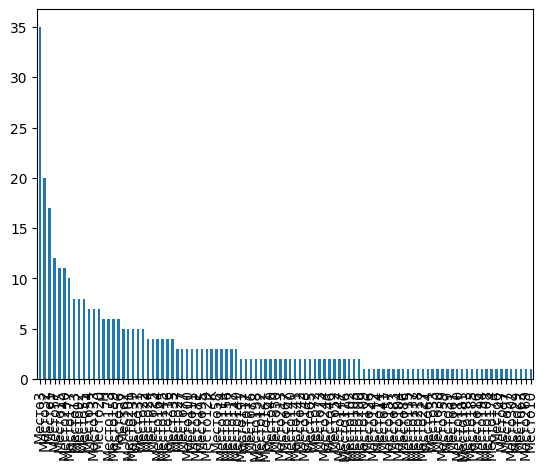

In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Место"].value_counts().plot.bar()

In [ ]:
df["Место"].value_counts()

Место3      1039
Место1       744
Место32      519
К            409
Место57      327
            ... 
Место291       1
Место329       1
Место270       1
Место407       1
Место186       1
Name: Место, Length: 314, dtype: int64

<Axes: >

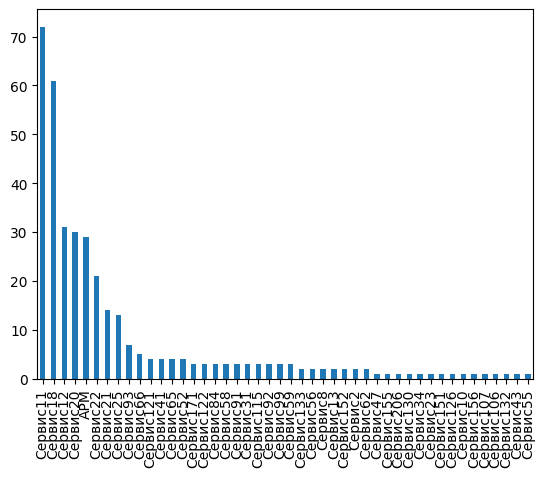

In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Сервис"].value_counts().plot.bar()

<Axes: >

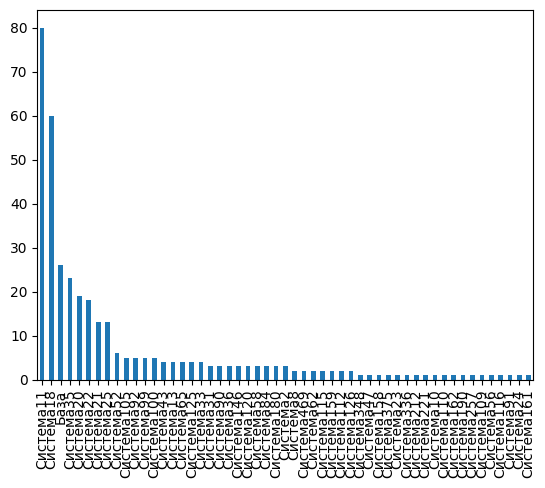

In [ ]:
df.loc[df["Тип переклассификации"] != 0, "Система"].value_counts().plot.bar()

In [ ]:
df_nodrop = df.drop_duplicates().reset_index(names="id")

In [ ]:
df_nodrop["diff"] = df_nodrop.id.diff()

<ipython-input-160-63491a3b0e9e>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  df_nodrop.set_index("Дата обращения").resample("1H").max()["diff"].plot(figsize=(15,5))


<Axes: xlabel='Дата обращения'>

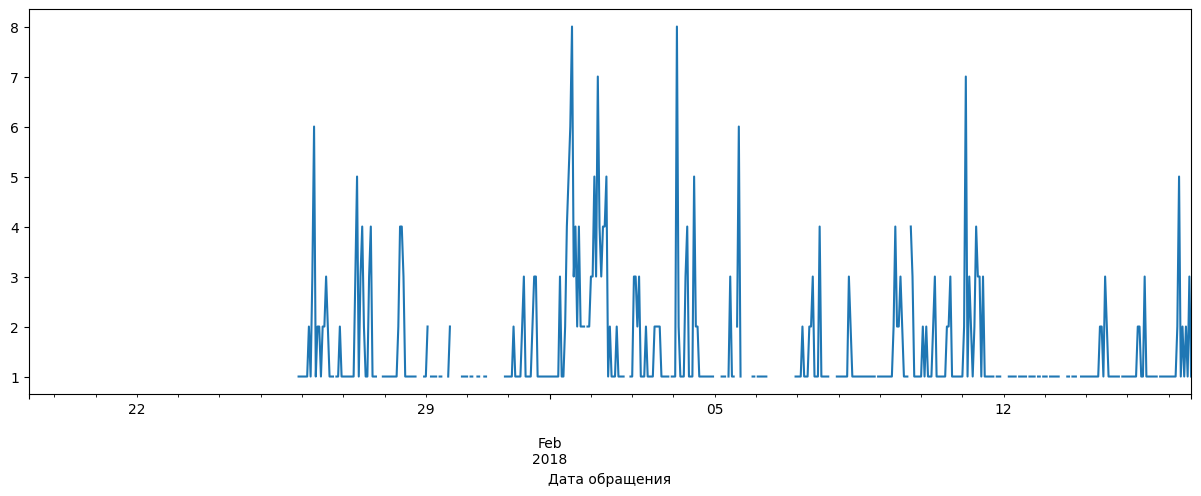

In [ ]:
df_nodrop.set_index("Дата обращения").resample("1H").max()["diff"].plot(figsize=(15,5))

In [ ]:
df_nodrop

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,...,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,t1,t2,t3,diff
0,0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,...,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К,NaT,NaT,NaT,NaN
1,1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,...,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К,NaT,NaT,NaT,1.0
2,2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,...,2018-01-25 22:47:00,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190,0 days 00:00:00,7 days 09:05:00,5 days 09:04:00,1.0
3,3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,...,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177,0 days 00:42:00,0 days 00:05:00,2 days 05:55:00,1.0
4,4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,...,2018-01-28 02:54:00,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216,2 days 03:15:00,7 days 04:59:00,5 days 23:57:00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,...,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50,0 days 00:00:00,7 days 01:16:00,5 days 01:15:00,1.0
13280,14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,...,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3,4 days 22:56:00,14 days 01:19:00,0 days 02:33:00,1.0
13281,14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,...,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163,4 days 17:53:00,14 days 01:45:00,0 days 07:22:00,1.0
13282,14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,...,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3,0 days 20:52:00,7 days 01:21:00,4 days 04:23:00,1.0


In [ ]:
df

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,t1,t2,t3
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42:00,2018-01-19 09:27:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43:00,4-Нет,3-Малое,База,К,NaT,NaT,NaT
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51:00,2018-01-19 09:36:00,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41:00,4-Нет,3-Малое,База,К,NaT,NaT,NaT
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51:00,2018-01-25 22:47:00,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47:00,2018-02-02 07:52:00,1-Особая,3-Малое,Система7,Место190,0 days 00:00:00,7 days 09:05:00,5 days 09:04:00
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50:00,2018-01-25 23:13:00,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00:00,4-Нет,3-Малое,База,Место177,0 days 00:42:00,0 days 00:05:00,2 days 05:55:00
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51:00,2018-01-25 23:39:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54:00,2018-02-04 07:53:00,4-Нет,4-Нет влияния,База,Место216,2 days 03:15:00,7 days 04:59:00,5 days 23:57:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17:00,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50,0 days 00:00:00,7 days 01:16:00,5 days 01:15:00
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36:00,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3,4 days 22:56:00,14 days 01:19:00,0 days 02:33:00
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23:00,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163,4 days 17:53:00,14 days 01:45:00,0 days 07:22:00
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24:00,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3,0 days 20:52:00,7 days 01:21:00,4 days 04:23:00


In [ ]:
df[df["Влияние"] == "1-Всеохватывающее"].sample(5)

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место,t1,t2,t3
10873,Тестирование дефекта,Сервис52,0-Критический,Отменен,СВ6,2018-02-10 09:02:00,2018-02-10 08:02:00,Инцидент,Инцидент,тест,0,NaT,2018-02-10 08:52:00,1-Особая,1-Всеохватывающее,Система52,Место1,NaT,NaT,NaT
11976,Тестирование,Сервис52,0-Критический,Отменен,СВ6,2018-02-11 10:38:00,2018-02-11 09:38:00,Инцидент,Инцидент,Тестирование,0,NaT,2018-02-11 10:52:00,1-Особая,1-Всеохватывающее,Система52,Место1,NaT,NaT,NaT
2900,.Тест. Тренировка. Переход на резервынй сервер...,Сервис34,3-Низкий,Отменен,ФГ816,2018-02-02 06:36:00,2018-01-29 00:45:00,Инцидент,Инцидент,Переход на резервный сервер выполнен в **:**. ...,0,NaT,2018-01-29 02:27:00,4-Нет,1-Всеохватывающее,Система36,Место181,NaT,NaT,NaT
13230,Тестовый запрос,Сервис52,0-Критический,Отменен,СВ6,2018-02-14 15:56:00,2018-02-14 14:56:00,Инцидент,Инцидент,Тестирование,0,NaT,2018-02-15 06:26:00,1-Особая,1-Всеохватывающее,Система52,Место1,NaT,NaT,NaT
8101,тестовый инцидент,Сервис11,3-Низкий,Отменен,ФГ128,2018-02-09 12:36:00,2018-02-05 11:22:00,Инцидент,Инцидент,Инцидент ************,0,NaT,2018-02-05 11:26:00,4-Нет,1-Всеохватывающее,Система11,Место1,NaT,NaT,NaT


<Axes: xlabel='Дата обращения'>

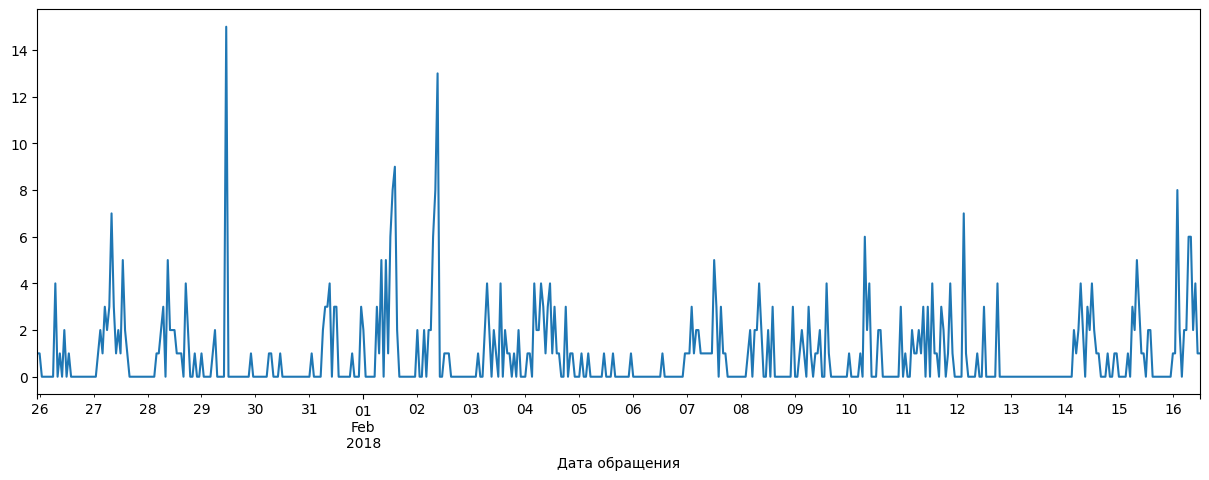

In [ ]:
df[df["Тип обращения на момент подачи"] == "Инцидент"].set_index("Дата обращения").resample("1H").count()["Содержание"].plot(figsize=(15,5))

In [ ]:
test_df = pd.read_csv("/content/test.csv")

NameError: ignored

<Axes: >

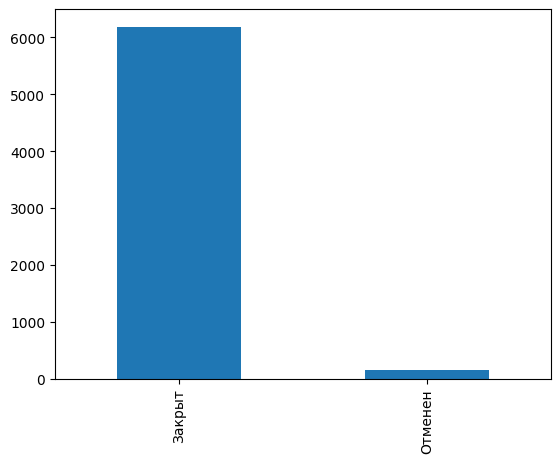

In [ ]:
test_df.loc[:, "Статус"].value_counts().plot.bar()

In [ ]:
test_df

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
6340,21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
6341,21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1
6342,21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,2018-03-09 12:36,2018-02-25 21:16,Инцидент,NaN,Самовосстановление,NaN,2018-03-07 09:28,2018-03-14 10:43,2-Повышенная,3-Малое,Система4,Место1


In [ ]:
test_df.drop_duplicates()

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
6340,21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
6341,21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1
6342,21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,2018-03-09 12:36,2018-02-25 21:16,Инцидент,NaN,Самовосстановление,NaN,2018-03-07 09:28,2018-03-14 10:43,2-Повышенная,3-Малое,Система4,Место1


In [ ]:
test_df[test_df.id == 14850]

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
47,14850,Система11: ошибка при создании запроса,Сервис11,3-Низкий,Закрыт,ФГ128,2018-02-25 16:31,2018-02-16 13:38,Запрос,NaN,Запросы созданы,NaN,2018-02-21 07:42,2018-03-07 09:06,4-Нет,4-Нет влияния,Система11,Место1


In [ ]:
test_df

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,21142,<Бот-наблюдения> Система53. Ухудшение статуса ...,Сервис53,3-Низкий,Закрыт,ФГ4,2018-03-07 14:36,2018-02-25 20:56,Инцидент,NaN,самовосстановление,NaN,2018-02-26 05:57,2018-03-14 07:53,2-Повышенная,3-Малое,Система53,Место1
6340,21143,<Бот-наблюдения> Система52. Ухудшение статуса ...,Сервис52,2-Средний,Закрыт,ФГ4,2018-03-07 14:06,2018-02-25 20:58,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:00,2018-03-14 07:53,1-Особая,3-Малое,Система52,Место1
6341,21144,<Бот-наблюдения> Система11. Ухудшение статуса ...,Сервис11,3-Низкий,Закрыт,ФГ4,2018-03-09 12:36,2018-02-25 21:05,Инцидент,NaN,самовосстановление,NaN,2018-02-26 06:03,2018-03-14 07:53,4-Нет,3-Малое,Система11,Место1
6342,21145,<Бот-наблюдения>Система364. Ухудшение статуса ...,Сервис4,3-Низкий,Закрыт,ФГ5,2018-03-09 12:36,2018-02-25 21:16,Инцидент,NaN,Самовосстановление,NaN,2018-03-07 09:28,2018-03-14 10:43,2-Повышенная,3-Малое,Система4,Место1


In [ ]:
sub_df = pd.read_csv("/content/submission.csv")

In [ ]:
sub_df

,id,Тип переклассификации,Тип обращения итоговый
0,14803,NaN,NaN
1,14804,NaN,NaN
2,14805,NaN,NaN
3,14806,NaN,NaN
4,14807,NaN,NaN
...,...,...,...
6339,21142,NaN,NaN
6340,21143,NaN,NaN
6341,21144,NaN,NaN
6342,21145,NaN,NaN
